# Transformer Metrics

## Imports

In [1]:
# Add Utils to path
import sys
sys.path.append('../Utils')  # Adds higher directory to python modules path.
from metrics import mAP_mAR, training_evol
from plots import plot_prediction, plot_image

# Metrics and Plots
import pandas as pd
import matplotlib.pyplot as plt

## Models Trained

* Transformer | Clahe for training | 100 epochs | NVIDIA 3050 Laptop GPU
* Transformer | Raw for training | 50 epochs | NVIDIA 3060 Laptop GPU
* Transformer | HE for training | 50 epochs | NVIDIA 3050 Laptop GPU
* Transformer | Clahe for training | 50 epochs | NVIDIA 3060 Laptop GPU
* Transformer | CBA for training | 50 epochs | NVIDIA 3060 Laptop GPU

In [2]:
clahe_100 = mAP_mAR('clahe_100') 
raw = mAP_mAR('raw')
he = mAP_mAR('he')
clahe = mAP_mAR('clahe')
cba = mAP_mAR('color_balance_adjustment')

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.89s).
Accumulating evaluation results...
DONE (t=0.19s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.314
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.579
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.292
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.188
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.334
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.495
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.501
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDet

## mAP & mAR Comparison

In [3]:
# All Models
mAP_50 = [raw[0], clahe_100[0], he[0], clahe[0], cba[0]]
mAP_50_95 = [raw[1], clahe_100[1], he[1], clahe[1], cba[1]]
mAR_50_95 = [raw[2], clahe_100[2], he[2], clahe[2], cba[2]]
df = pd.DataFrame({'mAP_50': mAP_50, 'mAP_50_95': mAP_50_95, 'mAR_50_95': mAR_50_95}, index=['raw', 'clahe_100', 'he', 'clahe', 'cba'])
df

,mAP_50,mAP_50_95,mAR_50_95
raw,0.559780,0.320850,0.506456
clahe_100,0.579489,0.314141,0.500944
he,0.479664,0.264396,0.441619
clahe,0.567919,0.311618,0.505646
cba,0.555781,0.322582,0.493517


In [4]:
# Without clahe_100
mAP_50 = [raw[0], he[0], clahe[0], cba[0]]
mAP_50_95 = [raw[1], he[1], clahe[1], cba[1]]
mAR_50_95 = [raw[2], he[2], clahe[2], cba[2]]
df = pd.DataFrame({'mAP_50': mAP_50, 'mAP_50_95': mAP_50_95, 'mAR_50_95': mAR_50_95}, index=['raw', 'he', 'clahe', 'cba'])
df

,mAP_50,mAP_50_95,mAR_50_95
raw,0.559780,0.320850,0.506456
he,0.479664,0.264396,0.441619
clahe,0.567919,0.311618,0.505646
cba,0.555781,0.322582,0.493517


## Training evol Comparison

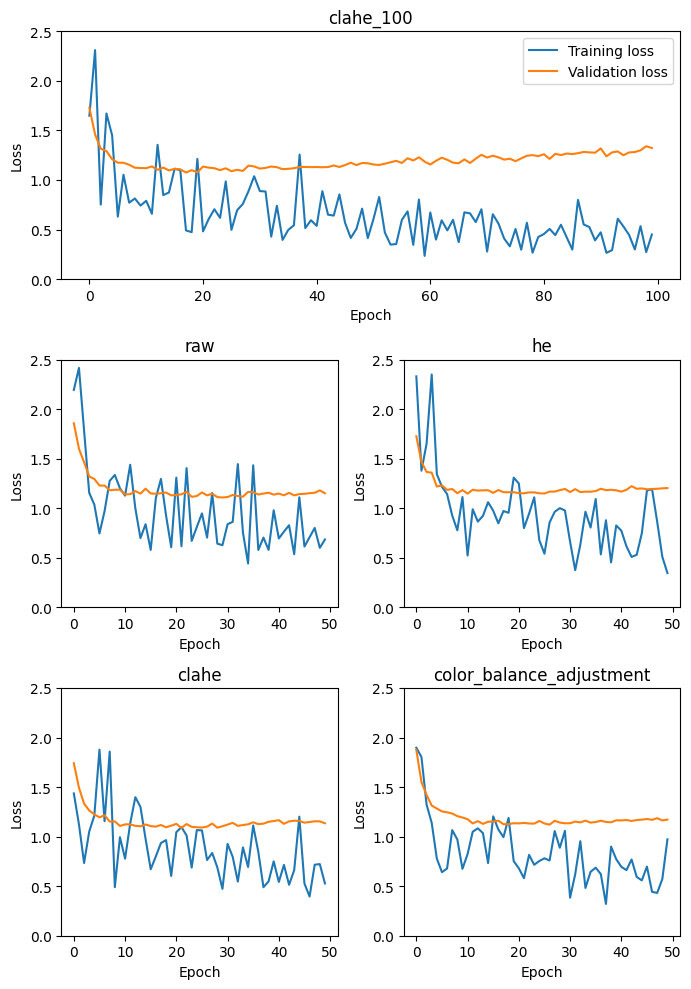

In [5]:
fig = plt.figure(figsize=(7,10))

ymin = 0
ymax = 2.5

ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2)
training_evol('clahe_100', legend=True)
ax1.set_ylim([ymin, ymax])

ax2 = plt.subplot2grid((3, 2), (1, 0))
training_evol('raw', legend=False)
ax2.set_ylim([ymin, ymax])

ax3 = plt.subplot2grid((3, 2), (1, 1))
training_evol('he')
ax3.set_ylim([ymin, ymax])

ax4 = plt.subplot2grid((3, 2), (2, 0))
training_evol('clahe')
ax4.set_ylim([ymin, ymax])

ax5 = plt.subplot2grid((3, 2), (2, 1))
training_evol('color_balance_adjustment')
ax5.set_ylim([ymin, ymax])

plt.tight_layout()
plt.show()

## Prediction Comparison

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.10s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


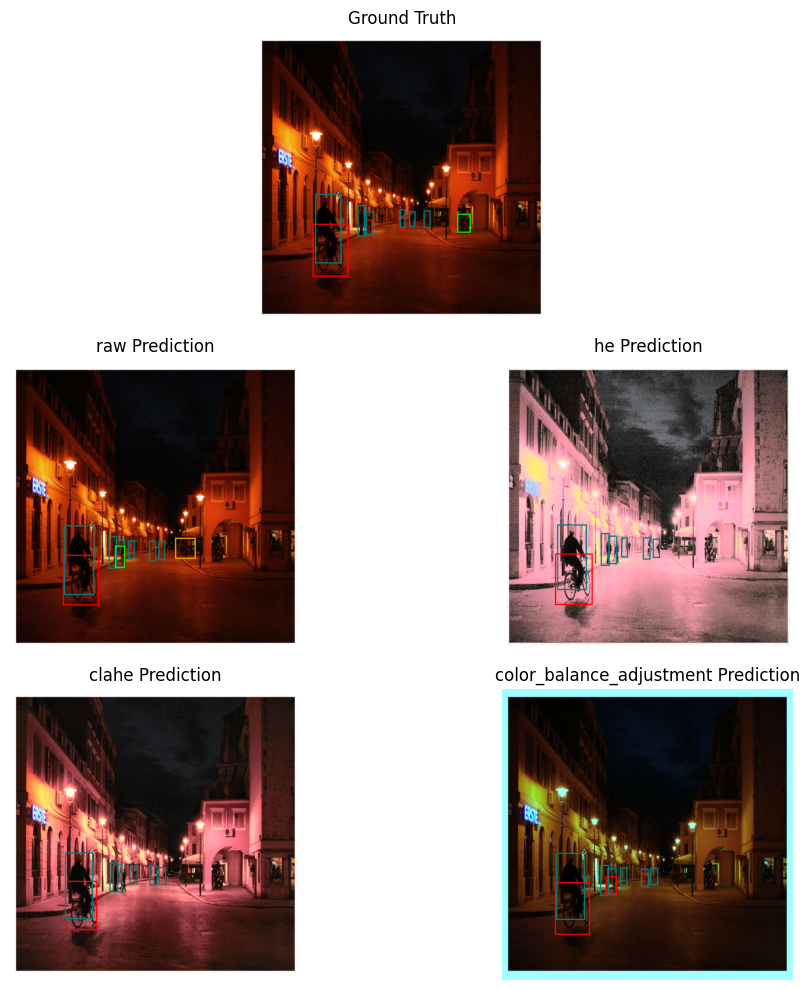

In [6]:
image_id = 200
test_path = '../ExDark_COCO/test_set.json'
model_path = "../Models/Transformer/lightning_logs/"
width = 3

fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2)
plot_image(image_id, test_path, width, 'raw')

ax2 = plt.subplot2grid((3, 2), (1, 0))
enhancement = 'raw'
model_path = f"../Models/Transformer/lightning_logs/{enhancement}/output"
plot_prediction(image_id, test_path, model_path, width, enhancement)

ax3 = plt.subplot2grid((3, 2), (1, 1))
enhancement = 'he'
model_path = f"../Models/Transformer/lightning_logs/{enhancement}/output"
plot_prediction(image_id, test_path, model_path, width, enhancement)

ax4 = plt.subplot2grid((3, 2), (2, 0))
enhancement = 'clahe'
model_path = f"../Models/Transformer/lightning_logs/{enhancement}/output"
plot_prediction(image_id, test_path, model_path, width, enhancement)

ax5 = plt.subplot2grid((3, 2), (2, 1))
enhancement = 'color_balance_adjustment'
model_path = f"../Models/Transformer/lightning_logs/{enhancement}/output"
plot_prediction(image_id, test_path, model_path, width, enhancement)

plt.tight_layout()
plt.show()

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


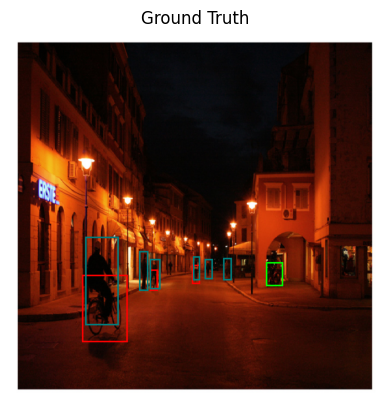

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


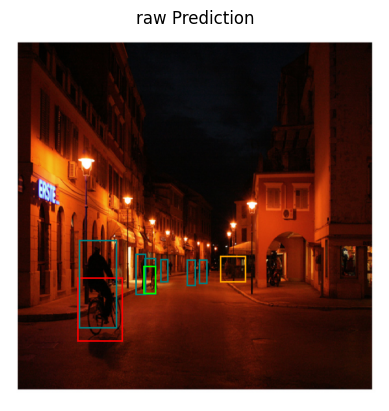

loading annotations into memory...
Done (t=0.11s)
creating index...
index created!


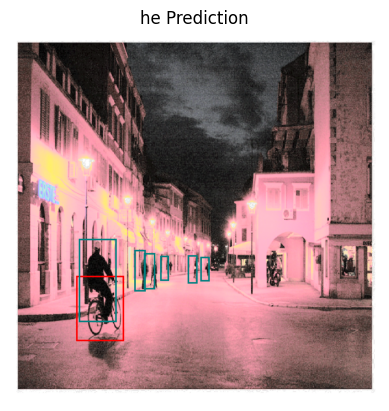

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


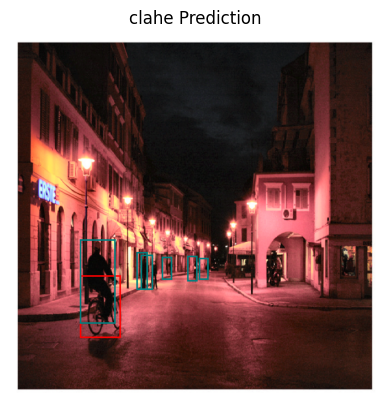

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


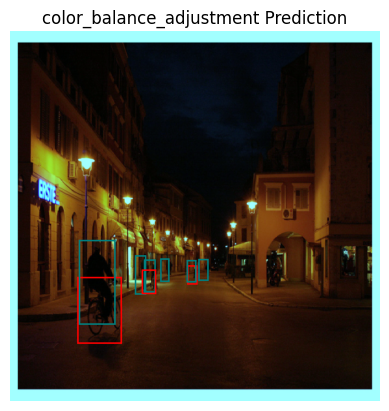

In [9]:
# Individual Plots
plot_image(image_id, test_path, width, 'raw')
plt.show()

enhancement = 'raw'
model_path = f"../Models/Transformer/lightning_logs/{enhancement}/output"
plot_prediction(image_id, test_path, model_path, width, enhancement)
plt.show()

enhancement = 'he'
model_path = f"../Models/Transformer/lightning_logs/{enhancement}/output"
plot_prediction(image_id, test_path, model_path, width, enhancement)
plt.show()

enhancement = 'clahe'
model_path = f"../Models/Transformer/lightning_logs/{enhancement}/output"
plot_prediction(image_id, test_path, model_path, width, enhancement)
plt.show()

enhancement = 'color_balance_adjustment'
model_path = f"../Models/Transformer/lightning_logs/{enhancement}/output"
plot_prediction(image_id, test_path, model_path, width, enhancement)
plt.show()